In [1]:
pip list

Package            VersionNote: you may need to restart the kernel to use updated packages.
------------------ --------
argcomplete        1.12.3
attrs              21.2.0
backcall           0.2.0
colorama           0.4.4
cycler             0.10.0
debugpy            1.5.0

decorator          5.1.0
entrypoints        0.3
importlib-metadata 4.8.1
ipykernel          6.4.1
ipython            7.28.0
ipython-genutils   0.2.0
jedi               0.18.0
jsonschema         4.1.0
jupyter-client     7.0.6
jupyter-core       4.8.1
kiwisolver         1.3.2
matplotlib         3.4.3
matplotlib-inline  0.1.3
nbformat           5.1.3
nest-asyncio       1.5.1
numpy              1.21.2
pandas             1.3.3
parso              0.8.2
pickleshare        0.7.5
Pillow             8.3.2
pip                21.3
plotly             5.3.1
prompt-toolkit     3.0.20
Pygments           2.10.0
pyparsing          2.4.7
pyrsistent         0.18.0
python-dateutil    2.8.2
pytz               2021.3
pywin32            302

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data PreProcessing : 

In [3]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
desc = pd.read_csv("data_description.txt" , sep = "-")

In [5]:
desc.columns = ["description"]

In [6]:
print(desc["description"].tolist())

['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'ypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class']


In [7]:
df.columns = desc["description"].tolist()

In [8]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

#### Converting Objects to numerical :

In [10]:
def convert_dtype(df , col) :
    new_col = pd.to_numeric(df[col] , errors = "coerce" , downcast='integer')
    return new_col

In [11]:
cols_to_conv = ["packed cell volume" , "white blood cell count" , "red blood cell count"]

for feature in cols_to_conv : 
    df[feature] =  convert_dtype(df , feature)
    
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [12]:
df = df.drop(["id"] , axis = 1)

### Extracting numerical features and categorical features

##### first method

In [13]:
df_type = df.dtypes.to_frame()
df_type.columns  = ["type"]
df_type = df_type.reset_index()
categorical_features = df_type[df_type["type"] == object]["index"].tolist()
numerical_features = df_type[df_type["type"] == float]["index"].tolist()

##### second method

In [14]:
def extract_num_cat(df):
    num_cols = df.dtypes.to_frame()[df.dtypes.to_frame()[0] == float].index.tolist()
    cat_cols = df.dtypes.to_frame()[df.dtypes.to_frame()[0] == object].index.tolist()
    return cat_cols , num_cols

##### third method

In [15]:
def extract_num_cat2(df):
    cat_cols = [col for col in df.columns if df[col].dtype == object]
    num_cols = [col for col in df.columns if df[col].dtype == float]
    return cat_cols , num_cols

In [16]:
cat_cols , num_cols = extract_num_cat2(df)

In [17]:
print(num_cols)

['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']


### Checking for redundunt values 

In [18]:
for f in cat_cols:
    print('{} feature has {}  unique values witch are {} '.format(f , len(df[f].unique().tolist()) , df[f].unique().tolist()))
    print('\n')

red blood cells feature has 3  unique values witch are [nan, 'normal', 'abnormal'] 


 pus cell feature has 3  unique values witch are ['normal', 'abnormal', nan] 


pus cell clumps feature has 3  unique values witch are ['notpresent', 'present', nan] 


bacteria feature has 3  unique values witch are ['notpresent', 'present', nan] 


ypertension feature has 3  unique values witch are ['yes', 'no', nan] 


diabetes mellitus feature has 6  unique values witch are ['yes', 'no', ' yes', '\tno', '\tyes', nan] 


coronary artery disease feature has 4  unique values witch are ['no', 'yes', '\tno', nan] 


appetite feature has 3  unique values witch are ['good', 'poor', nan] 


pedal edema feature has 3  unique values witch are ['no', 'yes', nan] 


anemia feature has 3  unique values witch are ['no', 'yes', nan] 


class feature has 3  unique values witch are ['ckd', 'ckd\t', 'notckd'] 




###### Replacing defected values in categorical features

In [19]:
defected_cols = [col for col in cat_cols if len(df[col].unique().tolist()) > 3]
defected_cols.append('class')
for f in defected_cols : 
    df[f].replace({' yes' : 'yes' , '\tyes' : 'yes' , '\tno' : 'no' , 'ckd\t' : 'ckd'} , inplace = True)

## Data visualisation :

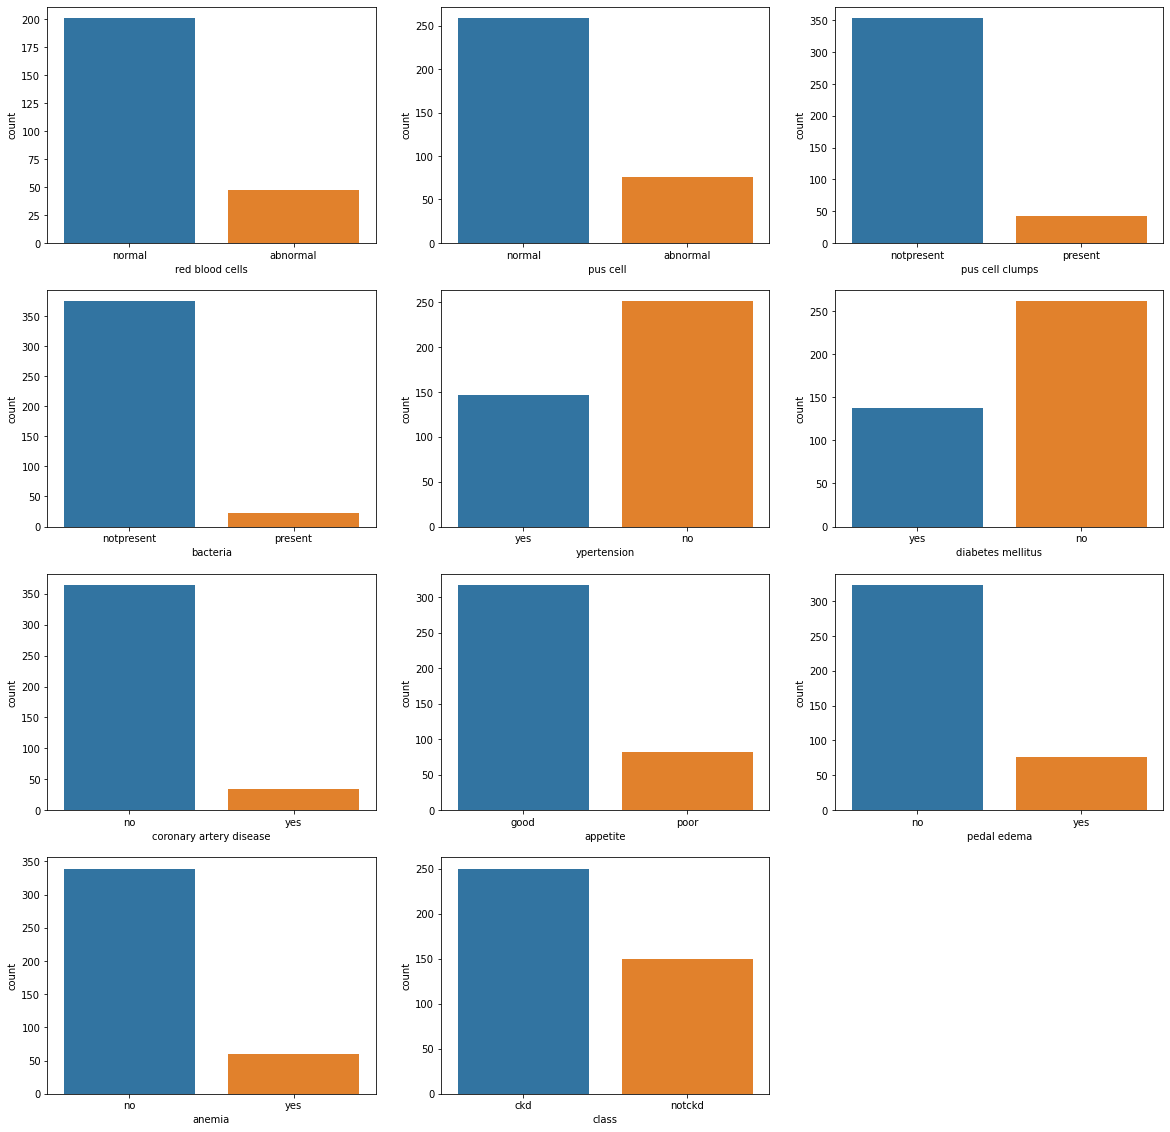

In [20]:
plt.figure(figsize=(20 , 20))
for i , f in (enumerate(cat_cols)):
    plt.subplot(4 , 3 , i+1)
    sns.countplot( x = df[f])

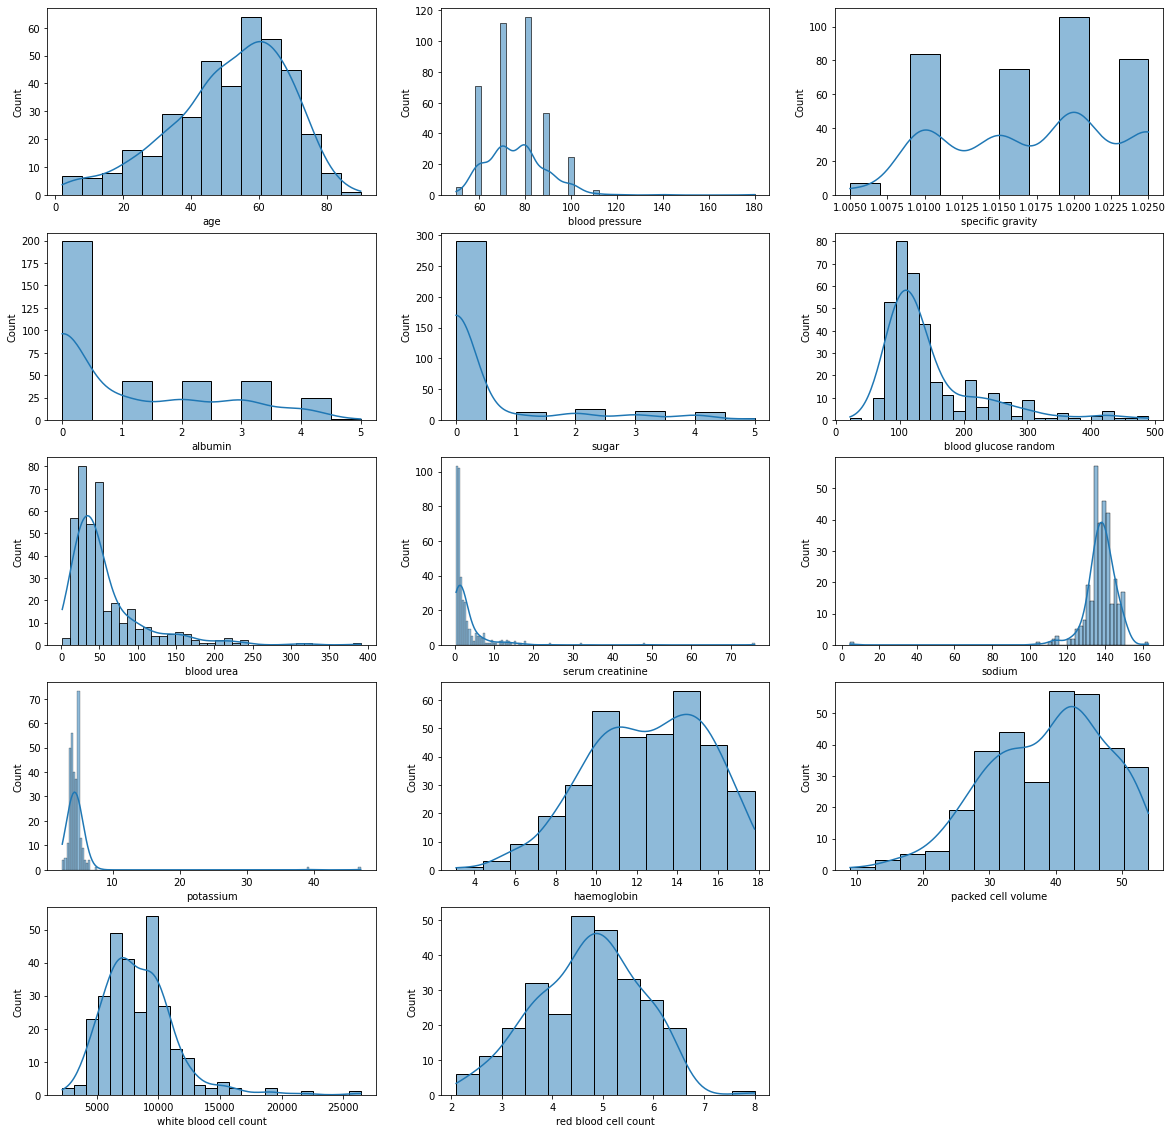

In [21]:
plt.figure(figsize=(20 , 20 ))
for i , f in (enumerate(num_cols)):
    plt.subplot(5 , 3 , i+1)
    sns.histplot(  x = df[f]  , kde = True  )

### corelation matrix :

<AxesSubplot:>

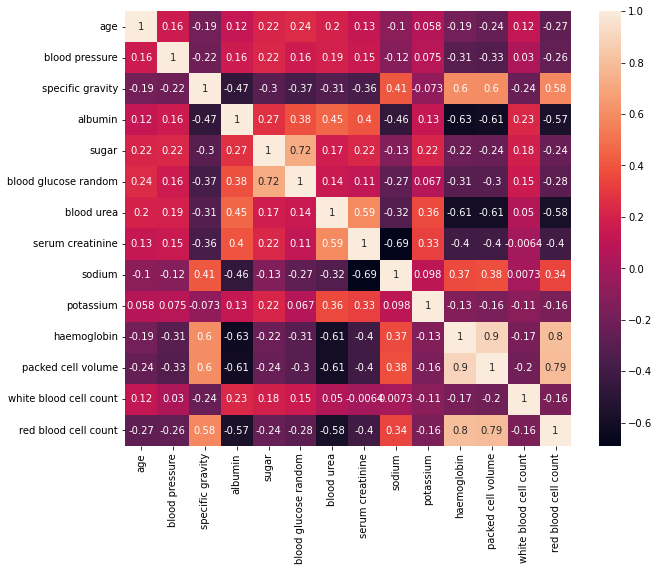

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True)

In [23]:
import plotly.express as px

In [26]:
px.violin(df , x="class" , y= "red blood cell count" , color = "class") 

In [36]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

In [43]:
(num_cols)

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#plt.ma(figsize=(15,15))
for i , f in enumerate(num_cols) : 
    fig = make_subplots(rows=4, cols=4)
    j=i%4+1
    c=i//4+1
    fig.add_trace(go.Violin(y=df[f] , x=df["class"] ),row=j, col=c)
    fig.show()  
#fig.update_layout(height=1000, width=1000, title_text="Side By Side Subplots")
    
    #plt.subplot(4,4,i+1)
    #px.violin(df, y=f, x="class", color="class", box=True)


In [82]:
df.isna().sum().sort_values(ascending = False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [113]:
random = df['red blood cells'].dropna().sample(152)
random.index

Int64Index([334,  83,  87,  27, 370, 186,  84, 332,   4, 230,
            ...
            299,  20, 361, 177, 284, 107,   9, 178, 391, 255],
           dtype='int64', length=152)

In [100]:
df["red blood cells"].isnull().sum()

152

In [116]:
df[df["red blood cells"].isna()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [114]:
random.index = df[df["red blood cells"].isna()].index

In [115]:
random.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [118]:
data = df.copy()

In [120]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random

In [128]:
data.isna().sum().sort_values(ascending= False ) 

red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
red blood cells              0
class                        0
dtype: int64

In [139]:
def random(data , col):
    data.loc[data[col].isnull(), col]=df[col].dropna().sample(df[col].isnull().sum())
    return data

In [199]:
random(data , 'sugar')

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
